In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv("public-train_1.csv",sep='|')
test=pd.read_csv("public-test_1.csv",sep='|')
train

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,3.76,NaN,26625,1,NaN,NaN,NaN,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.48,NaN,21,1,NaN,NaN,NaN,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,NaN,4.56,NaN,59885,1,NaN,NaN,NaN,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,NaN,4.39,NaN,26643,1,NaN,NaN,NaN,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,NaN,3.93,NaN,11772,1,NaN,NaN,NaN,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,author1144,How much is too much to love? Travis Maddox le...,Paperback,Original Edition,448.0,NaN,NaN,NaN,NaN,NaN,NaN,4.19,NaN,172198,1,NaN,NaN,NaN,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,NaN,478.0,NaN,NaN,NaN,NaN,NaN,NaN,4.21,NaN,43149,1,NaN,NaN,NaN,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,author1309,Following the launch of her #1 New York Times ...,Hardcover,First Edition,352.0,NaN,NaN,NaN,NaN,NaN,NaN,3.55,NaN,5811,1,NaN,NaN,NaN,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3548,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.64,NaN,14,1,NaN,NaN,NaN,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
(train.isnull().sum()/train.shape[0])*100

author_id          0.281690
description        1.070423
bookformat         0.366197
bookedition       93.492958
pages              2.788732
published_date    84.000000
publisher_id      84.000000
reading_age       96.450704
lexile_measure    97.521127
grade_level       97.183099
weight            85.380282
rating_value_0     0.281690
rating_value_1    84.422535
rating_count_0     0.000000
rating_count_1     0.000000
dimension_0       85.577465
dimension_1       85.577465
dimension_2       85.943662
genre_0            4.225352
genre_1            5.549296
genre_2            6.422535
genre_3            6.985915
genre_4            7.887324
genre_5            8.732394
genre_6            9.521127
genre_7           10.647887
genre_8           11.661972
genre_9           12.676056
genre_0_weight     4.225352
genre_1_weight     5.549296
genre_2_weight     6.422535
genre_3_weight     6.985915
genre_4_weight     7.887324
genre_5_weight     8.732394
genre_6_weight     9.521127
genre_7_weight    10

In [4]:
train.drop("price",axis=1)

,author_id,description,bookformat,bookedition,pages,published_date,publisher_id,reading_age,lexile_measure,grade_level,weight,rating_value_0,rating_value_1,rating_count_0,rating_count_1,dimension_0,dimension_1,dimension_2,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight
0,author2106,"Just after the Second World War, in the small ...",Hardcover,NaN,309.0,NaN,NaN,NaN,NaN,NaN,NaN,3.76,NaN,26625,1,NaN,NaN,NaN,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.48,NaN,21,1,NaN,NaN,NaN,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,NaN,496.0,NaN,NaN,NaN,NaN,NaN,NaN,4.56,NaN,59885,1,NaN,NaN,NaN,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,First Edition,418.0,NaN,NaN,NaN,NaN,NaN,NaN,4.39,NaN,26643,1,NaN,NaN,NaN,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,NaN,784.0,NaN,NaN,NaN,NaN,NaN,NaN,3.93,NaN,11772,1,NaN,NaN,NaN,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,author1144,How much is too much to love? Travis Maddox le...,Paperback,Original Edition,448.0,NaN,NaN,NaN,NaN,NaN,NaN,4.19,NaN,172198,1,NaN,NaN,NaN,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02
3546,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,NaN,478.0,NaN,NaN,NaN,NaN,NaN,NaN,4.21,NaN,43149,1,NaN,NaN,NaN,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02
3547,author1309,Following the launch of her #1 New York Times ...,Hardcover,First Edition,352.0,NaN,NaN,NaN,NaN,NaN,NaN,3.55,NaN,5811,1,NaN,NaN,NaN,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN
3548,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.64,NaN,14,1,NaN,NaN,NaN,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
for col in train.columns:
    if (train[col].isnull().sum()/train.shape[0])*100 >20 and col!='price':
        train=train.drop(col,1)

In [6]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,309.0,3.76,26625,1,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,4.48,21,1,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,496.0,4.56,59885,1,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,418.0,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,784.0,3.93,11772,1,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,author1144,How much is too much to love? Travis Maddox le...,Paperback,448.0,4.19,172198,1,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3546,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,478.0,4.21,43149,1,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3547,author1309,Following the launch of her #1 New York Times ...,Hardcover,352.0,3.55,5811,1,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3548,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,4.64,14,1,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
(train.isnull().sum()/train.shape[0])*100

author_id          0.281690
description        1.070423
bookformat         0.366197
pages              2.788732
rating_value_0     0.281690
rating_count_0     0.000000
rating_count_1     0.000000
genre_0            4.225352
genre_1            5.549296
genre_2            6.422535
genre_3            6.985915
genre_4            7.887324
genre_5            8.732394
genre_6            9.521127
genre_7           10.647887
genre_8           11.661972
genre_9           12.676056
genre_0_weight     4.225352
genre_1_weight     5.549296
genre_2_weight     6.422535
genre_3_weight     6.985915
genre_4_weight     7.887324
genre_5_weight     8.732394
genre_6_weight     9.521127
genre_7_weight    10.647887
genre_8_weight    11.661972
genre_9_weight    12.676056
price             84.704225
dtype: float64

In [8]:
train.iloc[1,1]

'Blame it on Hawaii’s rainbows, sparkling beaches, fruity cocktails, and sensuous breezes. For Heather Diamond, there for a summer course on China, a sea change began when romance bloomed with Fred, an ethnomusicologist from Hong Kong.One night under a full moon, Fred tells Heather the story of Chang’e, the moon goddess. He points out how the shadows form a rabbit pounding an elixir of immortality, but all Heather sees in the moon is a man’s face.Returning to her teaching job in Texas, Heather wonders if the whirlwind affair was a moment of madness. She is, after all, forty-five years old, married, a mother and grandmother.Rabbit in the Moon follows Heather and Fred’s relationship as well as Heather’s challenges with multiple mid-life reinventions, such as moving to Hawaii, entering a Ph.D. program, and living in a dorm with students half her age.When Fred goes on sabbatical, Heather finds herself on the Hong Kong island of Cheung Chau with his large, boisterous family. For an independ

In [9]:
train.loc[90]

author_id                                                author0708
description       For years, rumors of the “Marsh Girl” haunted ...
bookformat                                                Hardcover
pages                                                           370
rating_value_0                                                 4.47
rating_count_0                                              1236851
rating_count_1                                                    1
genre_0                                                     Fiction
genre_1                                          Historical Fiction
genre_2                                                     Mystery
genre_3                                                   Audiobook
genre_4                                                   Book Club
genre_5                                                       Adult
genre_6                                                     Romance
genre_7                                         

In [10]:
genre=[]
for i in range(train.shape[0]):
    genre += list(train.iloc[i,7:17].values)
genre=list(set(genre))

In [11]:
genre=genre[1:]

In [12]:
[i for i in genre if "Fiction" in i]

['Military Fiction',
 'Realistic Fiction',
 'Science Fiction',
 'Christian Non Fiction',
 'Womens Fiction',
 'Climate Change Fiction',
 'Literary Fiction',
 'Science Fiction Romance',
 'Adult Fiction',
 'Historical Fiction',
 'Young Adult Science Fiction',
 'Weird Fiction',
 'Hard Science Fiction',
 'Christian Fiction',
 'Fiction',
 'Science Fiction Fantasy',
 'Young Adult Historical Fiction',
 'Military Science Fiction',
 'Speculative Fiction']

In [13]:
train.iloc[2,3]

496.0

In [14]:
train.bookformat.value_counts()

Hardcover                2524
Paperback                 714
Kindle Edition            201
Mass Market Paperback      43
ebook                      42
Board Book                  3
Nook                        3
paperback                   2
Unknown Binding             1
Spiral-bound                1
Comics                      1
Library Binding             1
Trade Paperback             1
Name: bookformat, dtype: int64

In [15]:
for i in range(train.shape[0]):
    if train["bookformat"][i] in ["paperback","Trade Paperback"]:
        train["bookformat"][i] = "Paperback"
    else:
        if not (train["bookformat"][i] in ["Hardcover","Paperback","Kindle Edition","Mass Market Paperback","ebook"]):
            train["bookformat"][i] = "other"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
arr_hapus=[]
for i in range(train.shape[0]):
    arr=list(train.iloc[i,7:17].values)
    if all([pd.isnull(i) for i in arr]):
        arr_hapus.append(i)

In [17]:
arr_hapus

[17,
 27,
 44,
 76,
 83,
 85,
 89,
 93,
 136,
 140,
 195,
 197,
 255,
 294,
 298,
 326,
 327,
 379,
 475,
 563,
 576,
 584,
 606,
 675,
 680,
 689,
 787,
 795,
 807,
 827,
 832,
 870,
 884,
 925,
 926,
 947,
 989,
 1006,
 1014,
 1036,
 1040,
 1081,
 1120,
 1126,
 1130,
 1145,
 1179,
 1210,
 1220,
 1237,
 1243,
 1266,
 1269,
 1289,
 1303,
 1326,
 1344,
 1380,
 1410,
 1434,
 1438,
 1444,
 1490,
 1513,
 1516,
 1522,
 1523,
 1528,
 1547,
 1553,
 1559,
 1561,
 1564,
 1573,
 1645,
 1647,
 1678,
 1729,
 1731,
 1743,
 1751,
 1791,
 1802,
 1856,
 1950,
 1970,
 2038,
 2041,
 2076,
 2181,
 2205,
 2209,
 2214,
 2218,
 2222,
 2269,
 2270,
 2277,
 2285,
 2339,
 2349,
 2354,
 2364,
 2373,
 2391,
 2399,
 2406,
 2504,
 2510,
 2540,
 2555,
 2648,
 2649,
 2663,
 2684,
 2691,
 2695,
 2714,
 2715,
 2726,
 2737,
 2753,
 2767,
 2842,
 2845,
 2847,
 2859,
 2877,
 2972,
 2987,
 2989,
 2991,
 3028,
 3054,
 3081,
 3106,
 3127,
 3171,
 3222,
 3232,
 3284,
 3285,
 3290,
 3332,
 3349,
 3355,
 3394,
 3408,
 3525,
 3

In [18]:
copy_df=train
for i in range(train.shape[0]):
    if i in arr_hapus:
        train=train.drop(i)

In [19]:
train=train.reset_index().drop("index",1)

In [20]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,309.0,3.76,26625,1,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,NaN,4.48,21,1,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,496.0,4.56,59885,1,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,418.0,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,784.0,3.93,11772,1,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,Paperback,448.0,4.19,172198,1,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,478.0,4.21,43149,1,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3397,author1309,Following the launch of her #1 New York Times ...,Hardcover,352.0,3.55,5811,1,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3398,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,NaN,4.64,14,1,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
train.isnull().sum()

author_id            0
description          8
bookformat           0
pages               22
rating_value_0       0
rating_count_0       0
rating_count_1       0
genre_0              0
genre_1             47
genre_2             78
genre_3             98
genre_4            130
genre_5            160
genre_6            188
genre_7            228
genre_8            264
genre_9            300
genre_0_weight       0
genre_1_weight      47
genre_2_weight      78
genre_3_weight      98
genre_4_weight     130
genre_5_weight     160
genre_6_weight     188
genre_7_weight     228
genre_8_weight     264
genre_9_weight     300
price             2908
dtype: int64

In [22]:
train.update(train.pages.fillna(train.pages.mean()))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


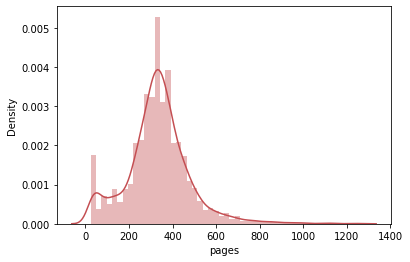

In [23]:
import seaborn as sns
sns.set_color_codes()
ax = sns.distplot(train.pages, color="r")

In [24]:
x=train.pages
normalized_pages = (x-x.mean())/x.std()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


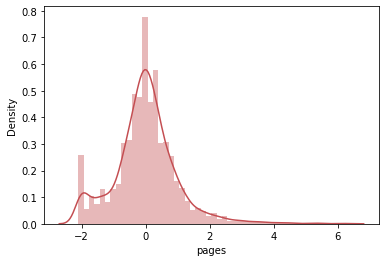

In [25]:
ax = sns.distplot(normalized_pages, color="r")

In [26]:
train["pages"]=normalized_pages

In [27]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,-0.167515,3.76,26625,1,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,0.000000,4.48,21,1,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,1.103450,4.56,59885,1,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,0.573315,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,3.060873,3.93,11772,1,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,Paperback,0.777213,4.19,172198,1,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,0.981112,4.21,43149,1,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3397,author1309,Following the launch of her #1 New York Times ...,Hardcover,0.124739,3.55,5811,1,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3398,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,0.000000,4.64,14,1,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
matriks=[]
for i in range(train.shape[0]):
    arr=[]
    for item in genre:
        if item in list(train.iloc[i,7:17].values):
            for j in range(10):
                if (item==train.iloc[i,7+j]):
                    weight=train.iloc[i,17+j]
                    arr.append(weight)
        else:
            arr.append(0)
    matriks.append(arr)
    print(i,end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [29]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(matriks)
matriks_genre=transformer.transform(matriks)

In [30]:
matriks_genre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
book_format=pd.get_dummies(train.bookformat)
book_format

,Hardcover,Kindle Edition,Mass Market Paperback,Paperback,ebook,other
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
3395,0,0,0,1,0,0
3396,1,0,0,0,0,0
3397,1,0,0,0,0,0
3398,0,1,0,0,0,0


In [32]:
from sklearn.decomposition import PCA
dfku=pd.concat([book_format,train[["pages"]],pd.DataFrame(matriks_genre)],axis=1)
pca = PCA()
x_pca = pca.fit_transform(dfku)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526
0,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405,0.018143,0.205428,-0.108566,-0.142729,-0.101879,0.003774,-0.022368,0.020490,-0.003921,0.005334,0.001886,0.008208,0.018324,0.033190,-0.013463,-0.014949,-0.004805,-0.005993,-0.012165,0.004111,0.008168,-0.026102,0.004470,0.005993,-0.015930,0.014399,-0.043637,0.026363,...,-0.000031,0.000008,-0.000007,7.698696e-05,0.000024,0.000002,-7.337963e-06,-0.000092,0.000011,-0.000011,0.000009,-5.825776e-05,0.000010,0.000018,-0.000001,0.000061,-0.000034,2.699880e-06,0.000005,-0.000015,-0.000012,-0.000017,0.000038,4.509160e-07,-0.000007,0.000007,-2.472936e-05,3.425154e-14,-6.389423e-17,1.104100e-17,-9.740255e-17,3.311441e-17,4.035266e-17,-3.703291e-17,7.381953e-17,-1.045209e-17,8.843394e-18,-7.125217e-17,2.024852e-17,8.873913e-18
1,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367,0.145448,0.213292,-0.270401,0.559993,0.129989,0.024694,-0.291554,-0.035371,-0.239051,0.042104,0.345089,0.075836,-0.222040,0.014974,0.381366,-0.008462,-0.128731,-0.003641,0.010556,0.016261,0.023597,-0.000468,0.055784,0.012092,0.037384,0.051981,0.096649,-0.020309,...,-0.000008,0.000052,-0.000090,-1.953579e-05,-0.000057,-0.000034,-4.632204e-05,-0.000002,-0.000044,-0.000004,-0.000012,4.225045e-05,-0.000008,-0.000054,0.000004,-0.000185,0.000022,-2.168166e-05,-0.000011,-0.000043,-0.000026,0.000017,-0.000068,6.939297e-05,-0.000013,0.000056,3.963108e-06,6.402710e-15,-1.508886e-16,1.985007e-16,3.300102e-16,5.680609e-18,-1.677406e-16,1.986608e-16,-2.781874e-16,1.210633e-16,-5.916936e-17,2.755359e-16,-2.633182e-17,1.418370e-17
2,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562,-0.011145,-0.173309,0.174382,-0.189737,-0.007000,-0.006102,-0.093668,0.025071,0.040257,-0.008112,-0.107508,-0.014420,-0.147238,0.031854,-0.069429,-0.001317,-0.073248,-0.002488,0.006733,-0.004349,-0.070458,-0.031109,-0.004390,0.088857,0.003791,0.010045,-0.035803,0.013888,...,-0.000163,0.000076,-0.000037,-2.940270e-05,-0.000032,0.000003,-4.412705e-07,-0.000004,-0.000005,-0.000092,-0.000040,3.956340e-07,0.000012,-0.000005,-0.000005,0.000155,0.000091,-4.934992e-06,-0.000038,0.000204,0.000016,0.000029,-0.000004,-6.506080e-06,0.000022,-0.000025,-1.370636e-05,-3.579524e-15,1.413563e-15,1.468245e-16,-1.002041e-16,7.070184e-17,9.455783e-17,6.624256e-18,1.766776e-16,6.929345e-17,7.791226e-18,-1.146377e-16,4.199442e-17,7.646114e-17
3,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794,-0.171039,-0.075011,-0.053603,-0.041154,0.022320,-0.071244,-0.038190,-0.169386,0.007835,0.253167,0.007585,0.174496,0.025841,-0.000182,-0.040646,-0.149529,-0.053668,-0.027267,-0.055657,-0.244700,0.025281,-0.048639,-0.051248,0.002985,0.038934,-0.000532,0.025107,0.043693,...,0.000038,-0.000002,-0.000041,-8.419593e-07,0.000005,0.000010,-2.467590e-06,-0.000004,-0.000003,0.000003,0.000003,3.547357e-06,0.000011,-0.000005,-0.000001,-0.000007,-0.000008,-1.157717e-05,-0.000001,0.000007,-0.000020,-0.000007,0.000002,7.849890e-06,0.000003,-0.000002,1.680627e-06,2.290794e-15,-2.510791e-15,-2.940539e-16,1.479797e-16,-3.858302e-16,-1.786217e-17,1.285246e-17,-3.398640e-17,-1.615861e-16,5.957681e-17,1.106001e-16,-6.153028e-17,-5.005605e-17
4,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249,-0.049751,-0.313289,0.247949,-0.093950,0.064770,0.014357,-0.339483,0.067535,0.067524,0.004254,0.027053,0.005687,-0.068908,0.012232,0.052428,0.008667,-0.014555,-0.003858,-0.018432,-0.003880,0.058507,0.013995,-0.023488,-0.050462,

In [33]:
explained_variance = pca.explained_variance_ratio_*100

In [34]:
sum(list(explained_variance)[:12])

86.00308347065031

In [35]:
explained_variance

array([4.57379955e+01, 1.42898640e+01, 6.31936010e+00, 4.00536765e+00,
       3.18262831e+00, 2.51349740e+00, 2.04600568e+00, 1.81590775e+00,
       1.67804614e+00, 1.54484569e+00, 1.51452537e+00, 1.35503989e+00,
       1.15589152e+00, 1.12832437e+00, 1.07919780e+00, 9.76348939e-01,
       8.25825740e-01, 7.37597615e-01, 6.73030669e-01, 6.20776680e-01,
       4.77599917e-01, 4.11015184e-01, 3.66904412e-01, 2.79099114e-01,
       2.58920035e-01, 2.54375935e-01, 2.28591643e-01, 2.08141733e-01,
       1.91307136e-01, 1.68078783e-01, 1.64971794e-01, 1.60729853e-01,
       1.42038802e-01, 1.32089249e-01, 1.30672678e-01, 1.24153064e-01,
       1.17699682e-01, 1.13308995e-01, 1.09073364e-01, 9.92319718e-02,
       9.03968898e-02, 8.42607970e-02, 8.35479899e-02, 7.91519509e-02,
       7.50045296e-02, 7.44049619e-02, 7.34380060e-02, 7.02569181e-02,
       6.97384845e-02, 6.27094518e-02, 6.20958646e-02, 5.95772044e-02,
       5.82319141e-02, 5.46883338e-02, 5.30976520e-02, 5.03263878e-02,
      

In [36]:
fix_pca=x_pca.iloc[:,:12]
fix_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [37]:
valid_price=[i for i in train.price.values if not pd.isnull(i)]
valid_price=np.array(valid_price).reshape(1,492)

In [38]:
fix_train=pd.concat([train[["author_id","description","price"]],fix_pca],axis=1)

In [39]:
fix_train

,author_id,description,price,0,1,2,3,4,5,6,7,8,9,10,11
0,author2106,"Just after the Second World War, in the small ...",NaN,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,author1087,"The Pulitzer Prize–winning, bestselling author...",NaN,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,NaN,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,author2622,The Romanovs were the most successful dynasty ...,NaN,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,NaN,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,NaN,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,author1309,Following the launch of her #1 New York Times ...,NaN,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,author1816,"Bachelors, beware. For those who keep secrets ...",NaN,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [40]:
fix_train.to_csv("fix_train.csv")

In [41]:
first_train=fix_train
first_train=first_train.drop(["author_id","description"],axis=1)
for i in range(fix_train.shape[0]):
    if pd.isnull(first_train["price"][i]):
        first_train=first_train.drop(i)
first_train=first_train.reset_index().drop("index",1)

In [42]:
first_train.to_csv("first_train.csv")

In [43]:
first_train

,price,0,1,2,3,4,5,6,7,8,9,10,11
0,98172.0,1.100989,0.667451,0.038605,0.211386,0.483281,0.179321,0.109576,0.082330,0.231880,-0.160006,-0.123556,-0.038740
1,103658.0,-0.185097,1.025340,-0.110028,-0.401748,-0.272121,0.047966,-0.180492,-0.359212,0.070825,-0.383857,0.143032,0.046667
2,649665.0,1.408702,-0.119214,-0.239304,0.666956,-0.213649,0.138979,0.013985,0.050338,-0.008652,-0.117175,-0.033429,-0.100087
3,117806.0,-0.201619,-0.436261,0.497762,0.009437,-0.000788,-0.000119,-0.103756,-0.004226,-0.153025,-0.028001,-0.021198,-0.106638
4,122281.0,1.456457,-0.090113,-0.279748,0.618571,0.039374,-0.182439,0.011078,-0.024305,-0.074577,-0.048423,0.029794,0.004493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,262176.0,0.174485,-0.289967,-0.300402,-0.409919,-0.105975,0.093890,-0.043952,-0.436218,0.125325,-0.392736,0.185444,0.090773
488,216411.0,-0.451888,-0.375512,-0.361667,-0.372522,-0.108425,0.104928,-0.076506,-0.296454,0.009990,-0.266875,0.143643,-0.008798
489,152310.0,0.727562,-0.328748,0.691782,-0.000861,-0.056800,-0.007380,-0.087931,0.014412,-0.037473,0.074821,0.084137,0.222676
490,176853.0,-1.794564,-0.538316,-0.293321,-0.081501,-0.011625,0.042347,-0.050229,0.020944,-0.044228,-0.024945,-0.110339,-0.104717


In [44]:
valid_price

array([[ 98172., 103658., 649665., 117806., 122281., 122281., 189847.,
        225939., 349375., 115640., 140761., 230848., 209192., 198509.,
        227960., 149712., 111309., 375362., 428490., 114485., 114774.,
        215111., 268961., 176565., 119250., 216555., 321801., 548462.,
        165881., 125313.,  86478., 136285., 531282., 173244., 130655.,
        282532., 244852., 108278., 219876., 100770., 216411., 187681.,
        189702.,  97883., 115352., 173244., 129500., 340136.,  57748.,
        274159., 267951.,  43167., 279212., 288596., 260877., 237200.,
         64966., 230848., 146824., 211502., 202118., 417951., 232724.,
        437874., 257989., 179741., 245285., 247739., 725892., 284698.,
        317470., 112175., 155053., 120549., 113764., 287152., 400194.,
        249904., 196343., 330607., 230848., 115352., 121993., 143648.,
        285131., 236911., 115352., 257700., 237777., 182628., 245429.,
        187537., 555824., 281522., 144081., 232580., 472812., 125313.,
      

In [57]:
valid_price=[i for i in train.price.values if not pd.isnull(i)]

from sklearn.preprocessing import StandardScaler

valid_price=np.array(valid_price).reshape(492,1)
scaler = StandardScaler()
# transform data
scaled_price = scaler.fit_transform(valid_price)

df_price=pd.DataFrame(scaled_price).rename(columns={0:"price"})

In [58]:
train.loc[pd.isnull(train.price) != True]["price"]

9       11.494476
27      11.548852
31      13.384212
46      11.676794
47      11.714077
          ...    
3370    12.476771
3374    12.284935
3380    11.933673
3388    12.083074
3391    12.285600
Name: price, Length: 492, dtype: float64

In [59]:
for i,fix_price in zip(list(train.loc[pd.isnull(train.price)!=True].price.index),list(df_price.price.values)):
    train["price"][i]=fix_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
train.loc[pd.isnull(train.price)!=True]

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
9,author0932,"At long last, New York Times bestselling autho...",Mass Market Paperback,1.157823,4.29,26983,504,Paranormal Romance,Paranormal,Romance,Demons,Fantasy,Angels,Mythology,Adult,Urban Fantasy,Supernatural,0.26,0.21,0.17,0.10,0.08,0.05,0.04,0.04,0.03,0.02,-1.286688
27,author2386,"From Rob Thomas, the creator of groundbreaking...",Paperback,-0.065566,3.99,43657,1537,Mystery,Fiction,Audiobook,Crime,Contemporary,Mystery Thriller,Adult,Young Adult,Thriller,Adult Fiction,0.45,0.19,0.07,0.07,0.06,0.05,0.04,0.04,0.03,0.02,-1.192599
31,author2769,"Hannis Arc, working on the tapestry of lines l...",Hardcover,1.320942,3.68,19382,1504,Fantasy,Fiction,Epic Fantasy,High Fantasy,Magic,Adventure,Science Fiction Fantasy,Romance,Adult,Audiobook,0.77,0.07,0.05,0.02,0.02,0.02,0.02,0.01,0.01,0.01,1.983212
46,author2883,How come the only thing my family tree ever gr...,Hardcover,-0.201498,3.80,1415,60,Memoir,Nonfiction,Humor,LGBT,Adult,Comedy,Relationships,Holiday,Essays,Biography,0.35,0.25,0.22,0.04,0.03,0.03,0.03,0.03,0.03,0.02,-0.971214
47,author0441,The New York Times bestselling Mortal Instrume...,Hardcover,1.368518,4.25,454617,5533,Fantasy,Young Adult,Romance,Paranormal,Urban Fantasy,Vampires,Angels,Fiction,Supernatural,Magic,0.34,0.24,0.09,0.09,0.06,0.05,0.04,0.04,0.03,0.03,-0.906703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,author1012,"Harlan Coben, the master of domestic suspense,...",Hardcover,0.117943,3.83,71693,5943,Mystery,Thriller,Fiction,Mystery Thriller,Suspense,Crime,Audiobook,Adult,Romance,Drama,0.28,0.20,0.17,0.09,0.08,0.07,0.03,0.03,0.02,0.02,0.413024
3374,author0083,"Alexander McCall Smith’s beloved, bestselling ...",Hardcover,-0.520938,4.12,14157,1407,Mystery,Fiction,Africa,Botswana,Crime,Humor,Cozy Mystery,Detective,Audiobook,Adult,0.37,0.25,0.16,0.06,0.04,0.03,0.03,0.03,0.02,0.02,0.081079
3380,author0975,From one of the most acclaimed and profound wr...,Hardcover,0.750027,3.84,7758,240,Nonfiction,Comics,History,Biography,Superheroes,Graphic Novels,Pop Culture,Memoir,Philosophy,Cultural,0.43,0.23,0.07,0.07,0.06,0.05,0.03,0.03,0.03,0.02,-0.526725
3388,author0034,Go the Fuck to Sleep is a bedtime book for par...,Hardcover,-1.832683,4.26,85767,15504,Humor,Fiction,Picture Books,Childrens,Comedy,Audiobook,Parenting,Poetry,Adult,Short Stories,0.39,0.14,0.09,0.08,0.07,0.06,0.06,0.05,0.04,0.02,-0.268209


In [61]:
fix_train=pd.concat([train[["author_id","description","price"]],fix_pca],axis=1)
fix_train

,author_id,description,price,0,1,2,3,4,5,6,7,8,9,10,11
0,author2106,"Just after the Second World War, in the small ...",NaN,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,author1087,"The Pulitzer Prize–winning, bestselling author...",NaN,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,NaN,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,author2622,The Romanovs were the most successful dynasty ...,NaN,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,NaN,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,NaN,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,author1309,Following the launch of her #1 New York Times ...,NaN,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,author1816,"Bachelors, beware. For those who keep secrets ...",NaN,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [62]:
first_train=fix_train
first_train=first_train.drop(["author_id","description"],axis=1)
for i in range(fix_train.shape[0]):
    if pd.isnull(first_train["price"][i]):
        first_train=first_train.drop(i)
first_train=first_train.reset_index().drop("index",1)
first_train

,price,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.286688,1.100989,0.667451,0.038605,0.211386,0.483281,0.179321,0.109576,0.082330,0.231880,-0.160006,-0.123556,-0.038740
1,-1.192599,-0.185097,1.025340,-0.110028,-0.401748,-0.272121,0.047966,-0.180492,-0.359212,0.070825,-0.383857,0.143032,0.046667
2,1.983212,1.408702,-0.119214,-0.239304,0.666956,-0.213649,0.138979,0.013985,0.050338,-0.008652,-0.117175,-0.033429,-0.100087
3,-0.971214,-0.201619,-0.436261,0.497762,0.009437,-0.000788,-0.000119,-0.103756,-0.004226,-0.153025,-0.028001,-0.021198,-0.106638
4,-0.906703,1.456457,-0.090113,-0.279748,0.618571,0.039374,-0.182439,0.011078,-0.024305,-0.074577,-0.048423,0.029794,0.004493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.413024,0.174485,-0.289967,-0.300402,-0.409919,-0.105975,0.093890,-0.043952,-0.436218,0.125325,-0.392736,0.185444,0.090773
488,0.081079,-0.451888,-0.375512,-0.361667,-0.372522,-0.108425,0.104928,-0.076506,-0.296454,0.009990,-0.266875,0.143643,-0.008798
489,-0.526725,0.727562,-0.328748,0.691782,-0.000861,-0.056800,-0.007380,-0.087931,0.014412,-0.037473,0.074821,0.084137,0.222676
490,-0.268209,-1.794564,-0.538316,-0.293321,-0.081501,-0.011625,0.042347,-0.050229,0.020944,-0.044228,-0.024945,-0.110339,-0.104717


In [54]:
fix_train.to_csv("fix_train.csv")
first_train.to_csv("first_train.csv")

In [52]:
price_inversed = [10**x for x in scaled_price]

In [53]:
price_inversed[0]

array([3.12231217e+11])

In [ ]:
valid_price[0]

array([98172.])

In [ ]:
np.log(price_inversed[0])

array([26.46700983])

In [ ]:
scaled_price[0]

array([11.49447632])

In [ ]:
fix_train.head()

,author_id,description,price,0,1,2,3,4,5,6,7,8,9,10,11
0,author2106,"Just after the Second World War, in the small ...",NaN,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,author1087,"The Pulitzer Prize–winning, bestselling author...",NaN,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,NaN,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,author2622,The Romanovs were the most successful dynasty ...,NaN,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249


In [ ]:
first_train.head()

,price,0,1,2,3,4,5,6,7,8,9,10,11
0,11.494476,1.100989,0.667451,0.038605,0.211386,0.483281,0.179321,0.109576,0.082330,0.231880,-0.160006,-0.123556,-0.038740
1,11.548852,-0.185097,1.025340,-0.110028,-0.401748,-0.272121,0.047966,-0.180492,-0.359212,0.070825,-0.383857,0.143032,0.046667
2,13.384212,1.408702,-0.119214,-0.239304,0.666956,-0.213649,0.138979,0.013985,0.050338,-0.008652,-0.117175,-0.033429,-0.100087
3,11.676794,-0.201619,-0.436261,0.497762,0.009437,-0.000788,-0.000119,-0.103756,-0.004226,-0.153025,-0.028001,-0.021198,-0.106638
4,11.714077,1.456457,-0.090113,-0.279748,0.618571,0.039374,-0.182439,0.011078,-0.024305,-0.074577,-0.048423,0.029794,0.004493


In [ ]:
first_train.price.describe()

count    492.000000
mean      12.238077
std        0.578507
min        9.567525
25%       11.781142
50%       12.284935
75%       12.574657
max       13.793669
Name: price, dtype: float64

In [83]:
first_train

,price,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.286688,1.100989,0.667451,0.038605,0.211386,0.483281,0.179321,0.109576,0.082330,0.231880,-0.160006,-0.123556,-0.038740
1,-1.192599,-0.185097,1.025340,-0.110028,-0.401748,-0.272121,0.047966,-0.180492,-0.359212,0.070825,-0.383857,0.143032,0.046667
2,1.983212,1.408702,-0.119214,-0.239304,0.666956,-0.213649,0.138979,0.013985,0.050338,-0.008652,-0.117175,-0.033429,-0.100087
3,-0.971214,-0.201619,-0.436261,0.497762,0.009437,-0.000788,-0.000119,-0.103756,-0.004226,-0.153025,-0.028001,-0.021198,-0.106638
4,-0.906703,1.456457,-0.090113,-0.279748,0.618571,0.039374,-0.182439,0.011078,-0.024305,-0.074577,-0.048423,0.029794,0.004493
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.413024,0.174485,-0.289967,-0.300402,-0.409919,-0.105975,0.093890,-0.043952,-0.436218,0.125325,-0.392736,0.185444,0.090773
488,0.081079,-0.451888,-0.375512,-0.361667,-0.372522,-0.108425,0.104928,-0.076506,-0.296454,0.009990,-0.266875,0.143643,-0.008798
489,-0.526725,0.727562,-0.328748,0.691782,-0.000861,-0.056800,-0.007380,-0.087931,0.014412,-0.037473,0.074821,0.084137,0.222676
490,-0.268209,-1.794564,-0.538316,-0.293321,-0.081501,-0.011625,0.042347,-0.050229,0.020944,-0.044228,-0.024945,-0.110339,-0.104717


In [64]:
fix_train

,author_id,description,price,0,1,2,3,4,5,6,7,8,9,10,11
0,author2106,"Just after the Second World War, in the small ...",NaN,-0.089962,-0.319379,-0.328323,-0.399039,-0.072040,0.055839,0.092267,0.673990,-0.111626,-0.052971,0.096276,0.023405
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",NaN,-0.171214,0.998959,0.364810,-0.034142,-0.204306,-0.010768,-0.141697,0.028997,-0.045134,-0.044903,-0.035787,-0.093367
2,author1087,"The Pulitzer Prize–winning, bestselling author...",NaN,1.093016,-0.314725,0.755442,-0.045420,-0.038157,-0.027573,0.038380,-0.007074,0.022041,-0.018287,-0.081022,0.145562
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,NaN,0.667838,-0.210287,-0.290098,0.550924,-0.168529,0.159468,-0.015455,0.023471,-0.018889,-0.150353,-0.026111,-0.153794
4,author2622,The Romanovs were the most successful dynasty ...,NaN,3.017903,-0.054561,0.773461,-0.111497,-0.069453,-0.080232,0.196872,0.009274,0.213113,0.004928,-0.124282,0.379249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,NaN,0.628234,1.279088,0.087737,-0.092192,0.311391,-0.512818,-0.113688,0.062921,0.134396,-0.117181,-0.140384,-0.046798
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,NaN,1.082157,-0.153433,-0.324575,0.511458,-0.217775,0.193793,-0.043277,-0.040230,-0.032624,0.130998,-0.187439,-0.124468
3397,author1309,Following the launch of her #1 New York Times ...,NaN,0.133726,-0.318496,0.148288,0.005561,-0.012195,-0.073357,0.173687,0.033430,0.636304,0.296757,0.480103,-0.422448
3398,author1816,"Bachelors, beware. For those who keep secrets ...",NaN,-0.070557,0.508926,0.055951,0.016476,0.769583,0.736744,0.265566,0.008813,0.040232,0.073781,0.146649,0.159478


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

In [90]:
X = first_train.drop('price',axis=1)
y = first_train['price']

In [94]:
cv = KFold(n_splits = 5, random_state = 42,shuffle = True)

0.7803443028078686
0.7714440499338117
0.7716314303916915
0.7715984446709102
0.7716599014133243
0.7724448221852158


In [112]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = {"criterion" : ["mse","mae"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1)

gs = gs.fit(X,y)

In [160]:
print(gs.best_score_)

0.24064112617857142


In [114]:
print(gs.best_params_)

{'criterion': 'mae', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [116]:
print(gs.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)


In [124]:
model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=True,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
scored = cross_val_score(model,X,y,cv=cv,scoring=make_scorer(mean_squared_error))

print(scored.mean())

In [131]:
fix_train = fix_train.drop(['author_id','description'],axis=1)


In [158]:
train

,author_id,description,bookformat,pages,rating_value_0,rating_count_0,rating_count_1,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_0_weight,genre_1_weight,genre_2_weight,genre_3_weight,genre_4_weight,genre_5_weight,genre_6_weight,genre_7_weight,genre_8_weight,genre_9_weight,price
0,author2106,"Just after the Second World War, in the small ...",Hardcover,-0.167515,3.76,26625,1,Historical Fiction,Fiction,Historical,Audiobook,Romance,Books About Books,Adult,Adult Fiction,British Literature,Chick Lit,0.45,0.22,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.02,NaN
1,author1018,"Blame it on Hawaii’s rainbows, sparkling beach...",Paperback,0.000000,4.48,21,1,Memoir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,author1087,"The Pulitzer Prize–winning, bestselling author...",Hardcover,1.103450,4.56,59885,1,Nonfiction,History,Politics,Race,Social Justice,Audiobook,Sociology,Anti Racist,American History,African American,0.42,0.22,0.08,0.08,0.05,0.05,0.04,0.02,0.02,0.02,NaN
3,author1295,THINGS ARE ABOUT TO GET SERIOUS FOR HARRY DRES...,Hardcover,0.573315,4.39,26643,1,Fantasy,Urban Fantasy,Fiction,Magic,Paranormal,Audiobook,Vampires,Mystery,Supernatural,Fae,0.41,0.30,0.08,0.05,0.04,0.04,0.03,0.02,0.02,0.02,NaN
4,author2622,The Romanovs were the most successful dynasty ...,Hardcover,3.060873,3.93,11772,1,History,Nonfiction,Russia,Biography,Historical,Russian History,Audiobook,Politics,European History,Romanovs,0.42,0.30,0.09,0.08,0.04,0.02,0.01,0.01,0.01,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,author1144,How much is too much to love? Travis Maddox le...,Paperback,0.777213,4.19,172198,1,Romance,New Adult,Contemporary,Young Adult,Contemporary Romance,College,Fiction,Chick Lit,Fighters,Love,0.36,0.24,0.10,0.07,0.07,0.06,0.03,0.02,0.02,0.02,NaN
3396,author2852,Magneto and Professor X. Superman and Lex Luth...,Hardcover,0.981112,4.21,43149,1,Fantasy,Science Fiction,Adult,Fiction,Urban Fantasy,Paranormal,Superheroes,Audiobook,Adult Fiction,Young Adult,0.43,0.18,0.11,0.11,0.04,0.04,0.03,0.02,0.02,0.02,NaN
3397,author1309,Following the launch of her #1 New York Times ...,Hardcover,0.124739,3.55,5811,1,Cookbooks,Cooking,Nonfiction,Food,Foodie,NaN,NaN,NaN,NaN,NaN,0.68,0.14,0.13,0.05,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3398,author1816,"Bachelors, beware. For those who keep secrets ...",Kindle Edition,0.000000,4.64,14,1,Historical Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
first_train_copied = first_train.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for i in range(first_train.shape[0]):
  model.fit(X,y)
  x_predict = model.predict(first_train_copied.drop('price',axis=1).head(1))

  y.append(x_predict)

  X['price'] = y

  scaler.inverse_transform(X['price'])
  scaler.fit_transform(X['price'])
  first_train_copied = first_train_copied[i+1:]

In [96]:
model_2 = ExtraTreesRegressor(n_estimators=1000,max_leaf_nodes = 100,n_jobs=-1,
                              bootstrap=True,random_state=42)

scoring_2 = cross_val_score(model_2,X,y,cv=cv,scoring=make_scorer(mean_squared_error))


In [97]:
print(scoring_2.mean())

0.7920782382563567
